In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.engine import base_layer_utils
from keras.utils import tf_utils
from keras import activations
from keras import backend
from keras import constraints
from keras import initializers
from keras import regularizers
from keras.engine.base_layer import Layer
from keras.engine.input_spec import InputSpec
import tensorflow.compat.v2 as tf
from tensorflow.python.util.tf_export import keras_export

In [3]:
# 데이터셋 추출
Data_in = '.\data_in'
data=pd.read_csv(Data_in+'.\spam.csv',encoding='latin1')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

In [4]:
display(data.head(5))

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data=data[['v1','v2']]
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data['v1']=data['v1'].replace(['ham','spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ? b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
# 데이터 전처리 - 중복 데이터 삭제
n_unique_data=data['v2'].nunique()
display("중복된 데이터의 개수: {}".format(len(data)-n_unique_data))
data.drop_duplicates(subset='v2',inplace=True)

'중복된 데이터의 개수: 403'

0    4516
1     653
Name: v1, dtype: int64

<AxesSubplot:>

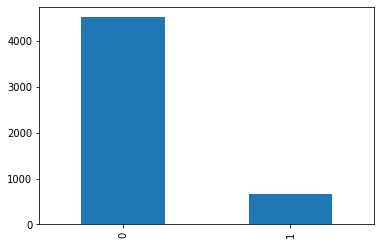

In [8]:
display(data['v1'].value_counts())
display(data['v1'].value_counts().plot(kind='bar'))

In [9]:
X_data=data['v2']
y_data=data['v1']

In [10]:
# 데이터 전처리 - 토큰화, 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 토큰화
sequences = tokenizer.texts_to_sequences(X_data) # 정수인코딩
print(sequences[-3:-1])

[[8912, 61, 8, 1740, 12, 18, 23, 99, 239, 8913], [5, 499, 110, 109, 8914, 24, 1, 3961, 55, 827, 31, 1145, 8, 1034, 181, 496, 193, 121, 7, 69, 951, 14, 2, 195, 12, 53]]


In [11]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'come': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [12]:
print(len(word_to_index))

8914


In [13]:
# 데이터 전처리 - 최하 빈도수 삭제
min_cnt = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0 
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < min_cnt):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(min_cnt - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4905
단어 집합에서 희귀 단어의 비율: 55.025802109041955
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.08689177618108


In [14]:
tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data) 

In [15]:
print(sequences[-3:-1])

[[61, 8, 1740, 12, 18, 23, 99, 239], [5, 499, 110, 109, 24, 1, 3961, 55, 827, 31, 1145, 8, 1034, 181, 496, 193, 121, 7, 69, 951, 14, 2, 195, 12, 53]]


메일의 최대 길이 : 183
메일의 평균 길이 : 14.640743


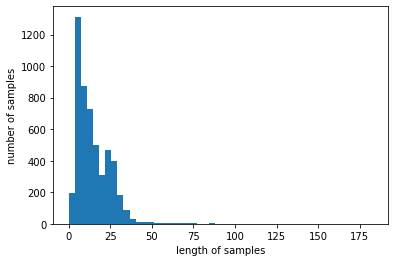

In [16]:
# 데이터 전처리 - 패딩
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
vocab_size = vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 4010


In [18]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


In [19]:
max_len = 183
data = pad_sequences(X_data, maxlen = max_len)
print("전체 데이터의 크기(shape): ", data.shape)

전체 데이터의 크기(shape):  (5169, 183)


In [20]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train])

### 모델 설계

In [32]:
# RNN 모델 구현 - Embedding
class MyEmbedding(Layer):
  def __init__(self,
               input_dim,
               output_dim,
               input_length=None,
               **kwargs):
    super(MyEmbedding, self).__init__(**kwargs)
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.input_length = input_length
    
  def build(self, input_shape=None):
    self.embeddings = self.add_weight(
        shape=(self.input_dim, self.output_dim))
    self.built = True

  def compute_output_shape(self, input_shape):
      return (input_shape[0],) + tuple(in_lens) + (self.output_dim,)

  def call(self, inputs):
    dtype = backend.dtype(inputs)
    if dtype != 'int32' and dtype != 'int64':
      inputs = tf.cast(inputs, 'int32')
    out = tf.nn.embedding_lookup(self.embeddings, inputs)
    return out


In [33]:
# RNN 모델 구현 - Dense
class MyDense(Layer):
  def __init__(self,
               units,
               activation=True,
               use_bias=True,
               kernel_initializer='glorot_uniform',
               bias_initializer='zeros',
               **kwargs):
    super(MyDense, self).__init__(**kwargs)
    self.units = int(units)
    self.activation = activations.get(activation)
    self.use_bias = use_bias
    self.kernel_initializer = initializers.get(kernel_initializer)
    self.bias_initializer = initializers.get(bias_initializer)
    
  def build(self, input_shape):
    input_shape = tf.TensorShape(input_shape)
    last_dim = tf.compat.dimension_value(input_shape[-1])
    
    self.kernel = self.add_weight(
        'kernel',
        shape=[last_dim, self.units],
        initializer=self.kernel_initializer)
    self.bias = self.add_weight(
        'bias',
        shape=[self.units,],
        initializer=self.bias_initializer)
    
  def call(self, inputs):
    rank = inputs.shape.rank
    if rank == 2:
      outputs = tf.matmul(a=inputs, b=self.kernel)
    elif rank>=3:
      outputs = tf.tensordot(inputs, self.kernel, [[rank - 1], [0]])

    if self.use_bias:
      outputs = tf.nn.bias_add(outputs, self.bias)
    return outputs

  def compute_output_shape(self, input_shape):
    return input_shape[:-1].concatenate(self.units)


In [34]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(MyEmbedding(vocab_size, 32)) 
model.add(SimpleRNN(32))
model.add(MyDense(1, activation='sigmoid'))

# 모델 학습
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 4s 50ms/step - loss: 0.3970 - acc: 0.8806 - val_loss: 0.4840 - val_acc: 0.8489
Epoch 2/10
52/52 [==============================] - 2s 43ms/step - loss: 0.2245 - acc: 0.9522 - val_loss: 0.1465 - val_acc: 0.9383
Epoch 3/10
52/52 [==============================] - 2s 43ms/step - loss: 0.0418 - acc: 0.9903 - val_loss: 0.1362 - val_acc: 0.9553
Epoch 4/10
52/52 [==============================] - 2s 43ms/step - loss: 0.0181 - acc: 0.9949 - val_loss: 0.1113 - val_acc: 0.9625
Epoch 5/10
52/52 [==============================] - 2s 43ms/step - loss: 0.0094 - acc: 0.9967 - val_loss: 0.1162 - val_acc: 0.9698
Epoch 6/10
52/52 [==============================] - 2s 45ms/step - loss: 0.0061 - acc: 0.9973 - val_loss: 0.1058 - val_acc: 0.9722
Epoch 7/10
52/52 [==============================] - 2s 43ms/step - loss: 0.0048 - acc: 0.9985 - val_loss: 0.1118 - val_acc: 0.9710
Epoch 8/10
52/52 [==============================] - 2s 43ms/step - loss: 0.0032 - a

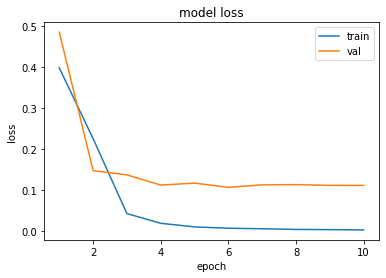

In [35]:
# 모델 검증
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()